## Name : Prachi Ranjan
## Contact No: +91 8106694870
## Mail ID : pra.rjn@gmail.com
## Oasis Infobyte Data Science Internship
## Github Link: https://github.com/PrachiRanjan3/OIBSIP
## Task 3 : Car Price Prediction with Machine Learning

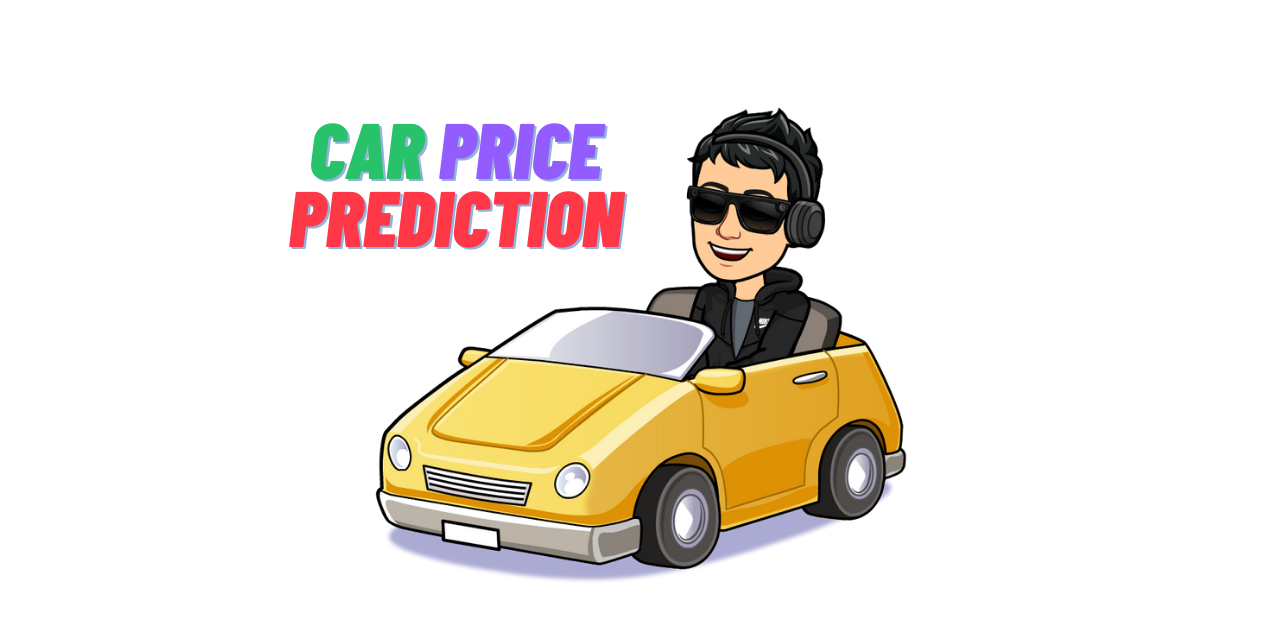
### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

## Importing the necessary libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from warnings import filterwarnings
filterwarnings('ignore')

## Exploring the dataset

In [96]:
d1= pd.read_csv('car data.csv')
d1.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [97]:
d1.shape

(301, 9)

In [98]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [99]:
d1.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [100]:
d1[d1.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [101]:
duplicate_rows = d1[d1.duplicated(keep='last')]
duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


## Cleaning the data

In [102]:
cleaned_data = d1.drop(duplicate_rows.index)
cleaned_data.to_csv('cleaned_data.csv')

In [103]:
cleaned_data.shape

(299, 9)

## Feature vs No_of_cars

In [104]:
no_of_cars_Car_Name = cleaned_data.groupby('Car_Name').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_Car_Name.head()

,Car_Name,No_of_cars
0,city,26
1,corolla altis,16
2,verna,14
3,brio,10
4,fortuner,10


In [105]:
import plotly.express as px
fig = px.sunburst(no_of_cars_Car_Name,
                  path=['Car_Name'], values='No_of_cars',
                  color_continuous_scale='Plasma', title='No of cars for each Car_Name', height=950,
                 template='ggplot2',custom_data=['No_of_cars'])
fig.update_traces(textinfo='label+value', textfont_size=14)
fig.show()

In [106]:
no_of_cars_year = cleaned_data.groupby('Year').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_year

,Year,No_of_cars
0,2015,60
1,2016,49
2,2014,38
3,2017,35
4,2013,33
5,2012,23
6,2011,19
7,2010,15
8,2008,7
9,2009,6


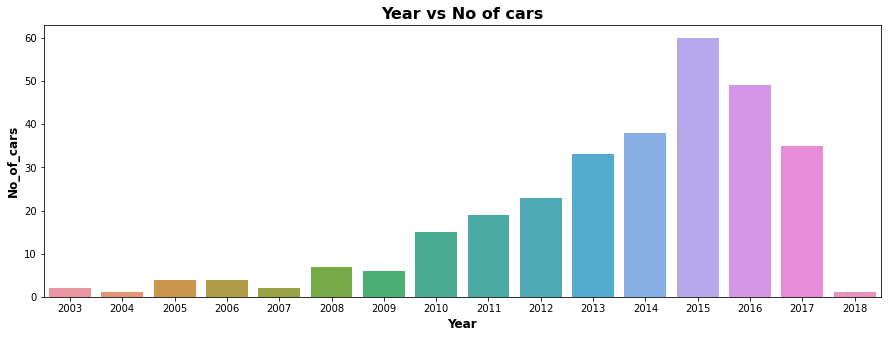

In [107]:
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='No_of_cars' , data = no_of_cars_year)
plt.title('Year vs No of cars', fontsize=16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('No_of_cars', fontsize=12, fontdict={'weight':'bold'})
plt.show()

In [108]:
no_of_cars_fuel = cleaned_data.groupby('Fuel_Type').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel

,Fuel_Type,No_of_cars
0,Petrol,239
1,Diesel,58
2,CNG,2


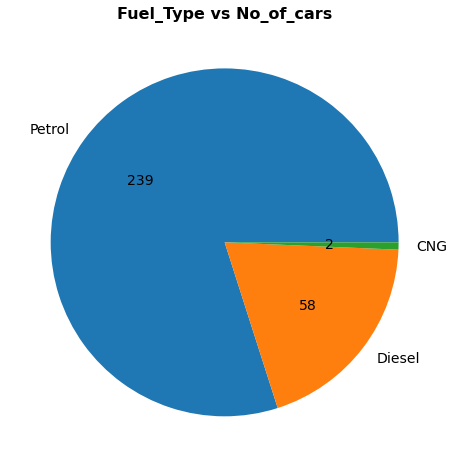

In [109]:
plt.figure(figsize=(8,8))
plt.pie(no_of_cars_fuel['No_of_cars'], autopct=lambda x: '{:.0f}'.format(x*no_of_cars_fuel['No_of_cars'].sum()/100), 
        labels = no_of_cars_fuel['Fuel_Type'], textprops={'fontsize': 14});
plt.title('Fuel_Type vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
plt.show()

In [110]:
no_of_cars_fuel_selling_type = cleaned_data.groupby('Selling_type').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel_selling_type

,Selling_type,No_of_cars
0,Dealer,193
1,Individual,106


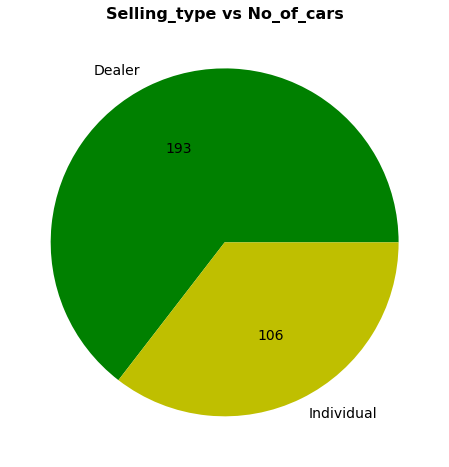

In [111]:
plt.figure(figsize=(8,8))
colors=['g','y']
plt.pie(no_of_cars_fuel_selling_type['No_of_cars'], autopct=lambda x: '{:.0f}'.format(x*no_of_cars_fuel['No_of_cars'].sum()/100), 
        labels = no_of_cars_fuel_selling_type['Selling_type'],colors=colors, textprops={'fontsize': 14});
plt.title('Selling_type vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
plt.show()

In [112]:
no_of_cars_fuel_transmission = cleaned_data.groupby('Transmission').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel_transmission

,Transmission,No_of_cars
0,Manual,260
1,Automatic,39


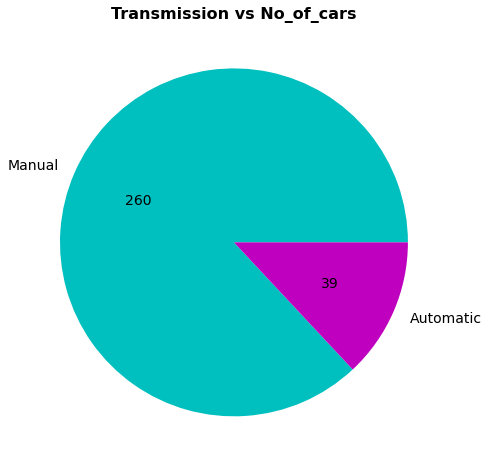

In [113]:
plt.figure(figsize=(8,8))
colors=['c','m']
plt.pie(no_of_cars_fuel_transmission['No_of_cars'], autopct=lambda x: '{:.0f}'.format(x*no_of_cars_fuel['No_of_cars'].sum()/100), 
        labels = no_of_cars_fuel_transmission['Transmission'],colors=colors, textprops={'fontsize': 14})
plt.title('Transmission vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
plt.show()

In [114]:
no_of_cars_fuel_Owner = cleaned_data.groupby('Owner').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel_Owner

,Owner,No_of_cars
0,0,288
1,1,10
2,3,1


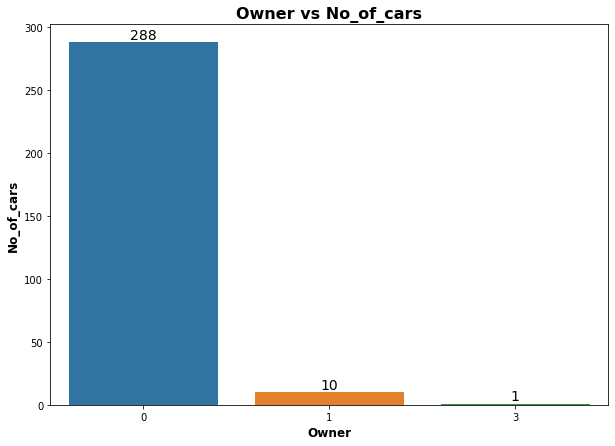

In [115]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='Owner', y='No_of_cars', data= no_of_cars_fuel_Owner)
plt.title('Owner vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
ax.bar_label(ax.containers[0], fontsize=14)
plt.xlabel('Owner', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('No_of_cars', fontsize=12, fontdict={'weight':'bold'})
plt.show()

## Multi-Variate Analysis

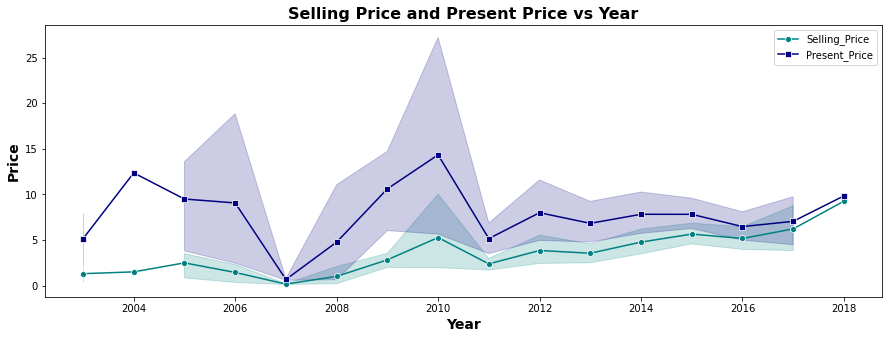

In [116]:
plt.figure(figsize=(15,5))
sns.lineplot('Year', 'Selling_Price', color= 'teal',label= 'Selling_Price', marker='o', data = cleaned_data)
sns.lineplot('Year', 'Present_Price', color='navy', label='Present_Price', marker='s', data = cleaned_data)
plt.title('Selling Price and Present Price vs Year', fontsize = 16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=14, fontdict={'weight':'bold'})
plt.ylabel('Price', fontsize=14, fontdict={'weight':'bold'})
plt.show()

## Bi-variate Analysis

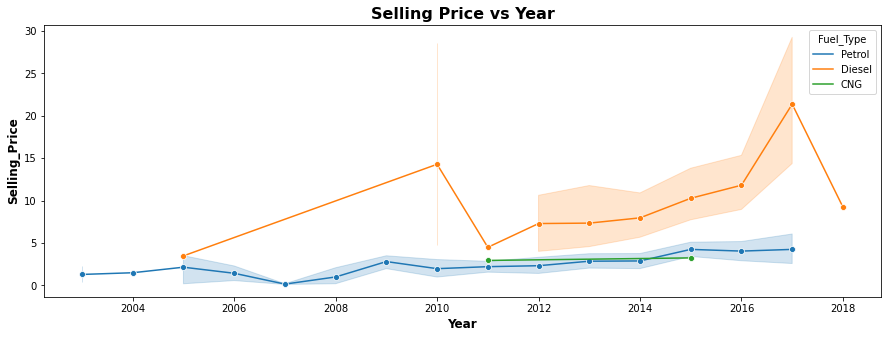

In [117]:
plt.figure(figsize=(15,5))
sns.lineplot('Year', 'Selling_Price', hue= 'Fuel_Type', marker='o', data = cleaned_data)
plt.title('Selling Price vs Year', fontsize = 16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('Selling_Price', fontsize=12, fontdict={'weight':'bold'})
plt.show()

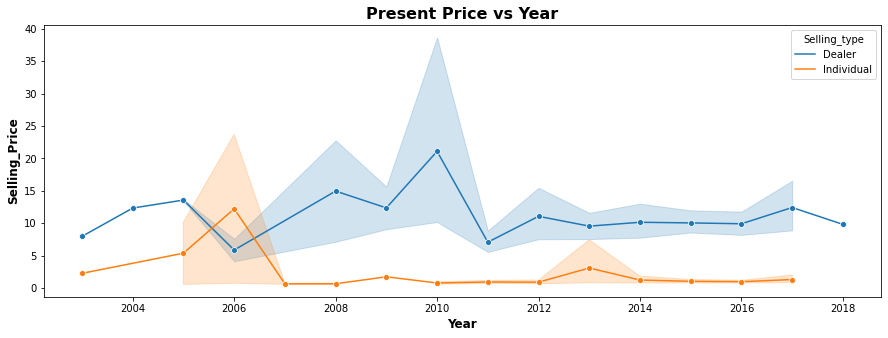

In [118]:
plt.figure(figsize=(15,5))
sns.lineplot('Year', 'Present_Price', hue= 'Selling_type', marker='o', data = cleaned_data)
plt.title('Present Price vs Year', fontsize = 16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('Selling_Price', fontsize=12, fontdict={'weight':'bold'})
plt.show()

## Data Transformation

In [119]:
transformed_data = cleaned_data.copy()

In [120]:
label_encoder= preprocessing.LabelEncoder()
transformed_data['Fuel_Type'] = label_encoder.fit_transform(transformed_data['Fuel_Type'])
transformed_data['Selling_type'] = label_encoder.fit_transform(transformed_data['Selling_type'])
transformed_data['Transmission'] = label_encoder.fit_transform(transformed_data['Transmission'])
transformed_data['Owner'] = label_encoder.fit_transform(transformed_data['Owner'])
transformed_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


## Relationship between Features

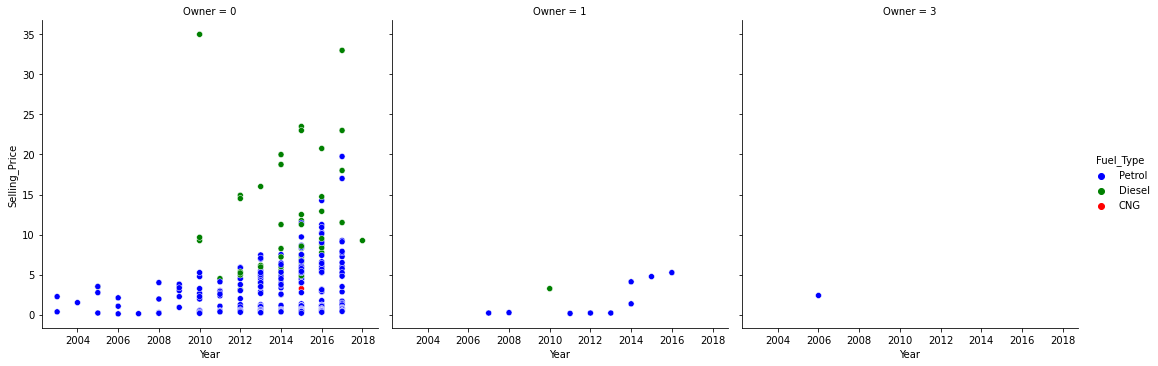

In [121]:
sns.relplot(x="Year", y="Selling_Price",hue= 'Fuel_Type',col ="Owner", data= cleaned_data, palette=['b','g','r'])

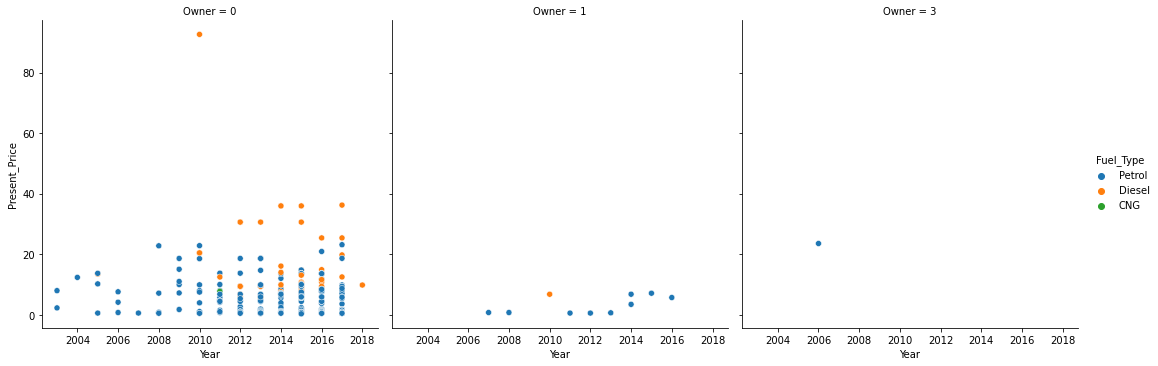

In [122]:
sns.relplot(x="Year", y="Present_Price",hue= 'Fuel_Type',col ="Owner", data= cleaned_data )

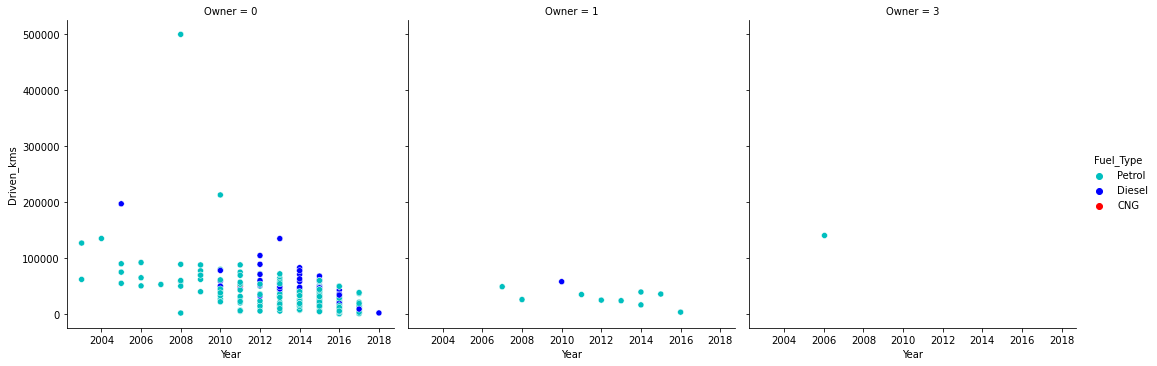

In [123]:
sns.relplot(x="Year", y="Driven_kms",hue= 'Fuel_Type',col ="Owner", data= cleaned_data, palette=['c', 'b','r'])

In [124]:
correlation = transformed_data.iloc[:,1:].corr()
correlation

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.046210,-0.036820,0.003434,-0.170694
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.500292,-0.553851,-0.348869,-0.096019
Present_Price,-0.053167,0.876305,1.000000,0.205224,-0.431887,-0.511779,-0.334326,-0.018158
Driven_kms,-0.525714,0.028566,0.205224,1.000000,-0.167287,-0.101030,-0.163881,0.061924
Fuel_Type,-0.046210,-0.500292,-0.431887,-0.167287,1.000000,0.347922,0.068618,0.055526
Selling_type,-0.036820,-0.553851,-0.511779,-0.101030,0.347922,1.000000,0.058669,0.123165
Transmission,0.003434,-0.348869,-0.334326,-0.163881,0.068618,0.058669,1.000000,-0.020306
Owner,-0.170694,-0.096019,-0.018158,0.061924,0.055526,0.123165,-0.020306,1.000000


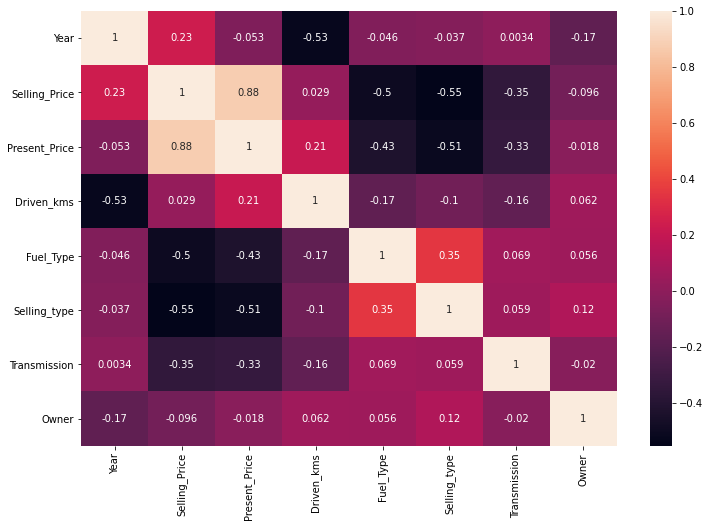

In [125]:
sns.heatmap(correlation, annot= True)
plt.gcf().set_size_inches(12, 8)

### From the above correlation plot we can infer the following :-
#### A -> Selling_Price is influenced by :
#### (i) Present_price by a score of 0.88
#### (ii) Fuel_Type by a score of 0.5
#### (iii) Selling_type by a score of 0.55
#### (iv) Transmission_type by a score of 0.35
#### B -> Present_Price is influenced by :
#### (i) Selling_price by a score of 0.88
#### (ii) Fuel_Type by a score of 0.43
#### (iii) Selling_type by a score of 0.51
#### (iv) Transmission_type by a score of 0.33

## Histogram Distribution

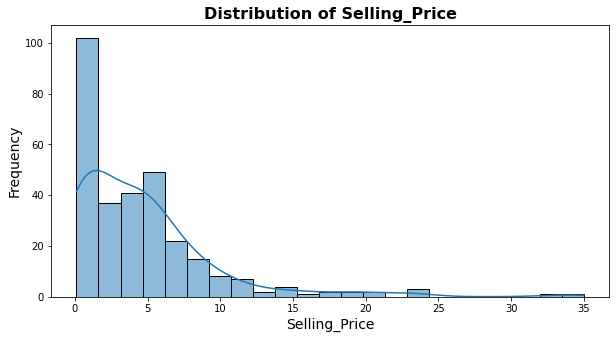

In [126]:
plt.figure(figsize=(10,5))
sns.histplot(transformed_data['Selling_Price'],kde=True)
plt.xlabel('Selling_Price', fontsize= 14 )
plt.ylabel('Frequency',fontsize= 14)
plt.title('Distribution of Selling_Price', fontsize= 16, fontdict={'weight':'bold'})
plt.show()

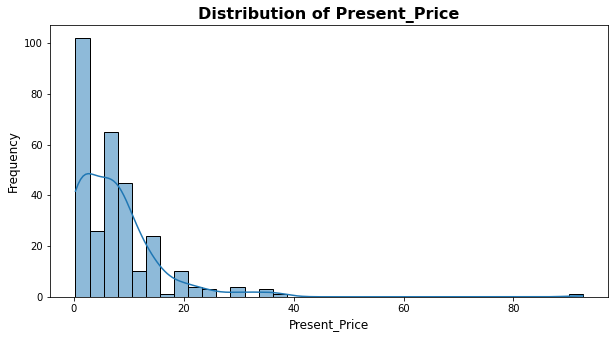

In [127]:
plt.figure(figsize=(10,5))
sns.histplot(transformed_data['Present_Price'],kde=True)
plt.xlabel('Present_Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Present_Price', fontsize= 16, fontdict={'weight':'bold'})
plt.show()

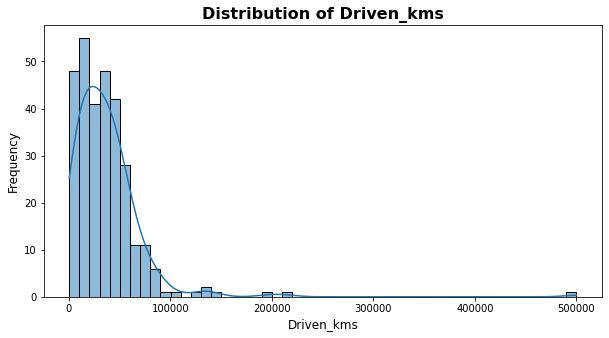

In [128]:
plt.figure(figsize=(10,5))
sns.histplot(transformed_data['Driven_kms'],kde=True)
plt.xlabel('Driven_kms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Driven_kms', fontsize= 16, fontdict={'weight':'bold'})
plt.show()

### Preparing the data for training and testing of model

In [129]:
x= transformed_data.drop(['Car_Name', 'Selling_Price'],axis=1)
y = transformed_data['Selling_Price']
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size= 0.2,random_state=0)

### Training the data using Linear Regression

In [130]:
model_1=LinearRegression().fit(x_train,y_train)

### Evaluating the performance using Linear Regression

In [131]:
y_pred1= model_1.predict(x_test)
#y_pred1

In [132]:
mse_1= mean_squared_error(y_test, y_pred1)
r2_1  = r2_score(y_test, y_pred1)
print('Mean Squared Error: ', mse_1)
print('R2 Squared: ', r2_1)

Mean Squared Error:  4.288445317609076
R2 Squared:  0.694602876378206


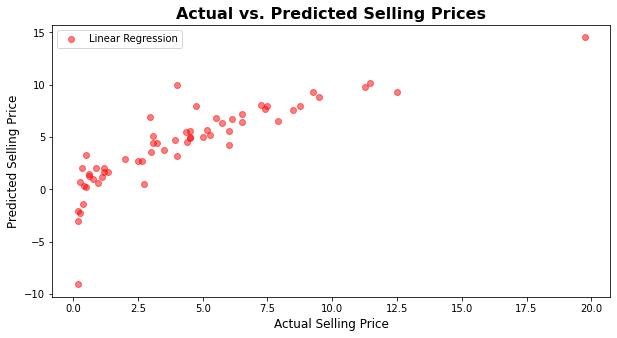

In [133]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred1, color='red', label ='Linear Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs. Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

### Training the data using Random Forest Regression

In [134]:
model_2=RandomForestRegressor().fit(x_train,y_train)

### Evaluating the performance using Random Forest Regression

In [135]:
y_pred2= model_2.predict(x_test)
y_pred2

array([ 6.912 ,  0.2269,  7.2774,  3.999 ,  2.86  ,  0.5967,  5.2933,
        4.0185,  2.8118,  1.1001,  4.192 ,  7.417 ,  0.2114,  2.956 ,
        1.944 ,  6.6004,  3.4589,  3.8636,  3.435 ,  8.8145,  0.2096,
        1.1184,  0.7559,  0.5387,  4.867 ,  1.0997,  0.1784,  4.8245,
        8.6767,  5.378 ,  5.0819,  5.3237,  7.6113,  1.1705,  4.7882,
        0.4934,  0.3253,  0.284 ,  5.3815,  7.9299,  7.839 ,  8.1739,
       10.2588,  3.525 ,  6.165 ,  0.5762,  2.979 , 16.2814,  6.528 ,
        2.61  ,  4.0735,  4.061 ,  0.3399,  1.1567,  5.282 , 10.8915,
        0.5647,  5.0295,  6.6468,  0.438 ])

In [136]:
mse_2= mean_squared_error(y_test, y_pred2)
r2_2  = r2_score(y_test, y_pred2)
print('Mean Squared Error: ', mse_2)
print('R2 Squared: ', r2_2)

Mean Squared Error:  0.8241748603333342
R2 Squared:  0.941307254012621


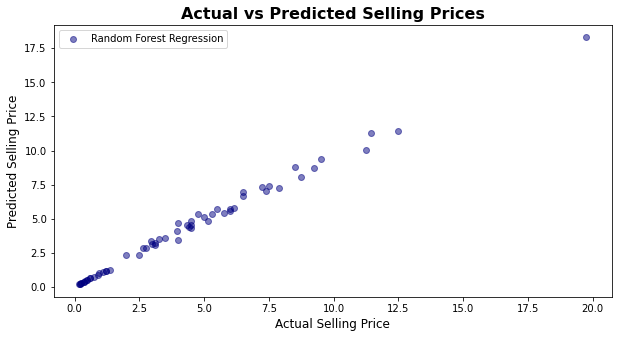

In [89]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred2, color='navy', label ='Random Forest Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

### Training the data using XGBoost Regressor

In [137]:
model_3=xg.XGBRegressor().fit(x_train,y_train)

### Evaluating the performance using XGBoost Regressor

In [138]:
y_pred3= model_3.predict(x_test)
y_pred3

array([ 6.2576513 ,  0.11091372,  7.4813976 ,  4.0983405 ,  2.8652728 ,
        0.72043806,  5.1985245 ,  4.7033806 ,  2.9216607 ,  1.3438361 ,
        3.9087176 ,  7.2630196 ,  0.19142888,  2.7584462 ,  1.5163258 ,
        6.885116  ,  3.3656764 ,  3.2808206 ,  3.9023073 ,  8.342279  ,
        0.12317677,  1.0741773 ,  0.711649  ,  0.5638582 ,  4.792696  ,
        1.1759001 ,  0.08543898,  4.892176  ,  8.732405  ,  5.2777925 ,
        3.5767477 ,  5.6195197 ,  7.6485357 ,  1.0903736 ,  4.0833187 ,
        0.4947301 ,  0.45341176,  0.18278483,  5.403917  ,  7.0500274 ,
        7.3974257 ,  7.9369593 ,  8.50931   ,  3.5710657 ,  6.4902573 ,
        0.64605737,  2.9268174 , 17.593233  ,  6.6048064 ,  2.608613  ,
        3.9018445 ,  3.7394507 ,  0.16916172,  1.1446251 ,  5.17047   ,
       10.978162  ,  0.50480944,  5.790315  ,  7.2149115 ,  0.5067724 ],
      dtype=float32)

In [139]:
mse_3= mean_squared_error(y_test, y_pred3)
r2_3  = r2_score(y_test, y_pred3)
print('Mean Squared Error: ', mse_3)
print('R2 Squared: ', r2_3)

Mean Squared Error:  0.971165860761198
R2 Squared:  0.9308394444909207


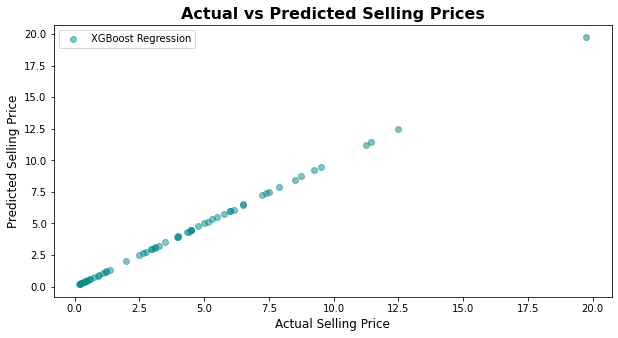

In [93]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred3, color='darkcyan', label ='XGBoost Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize=12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

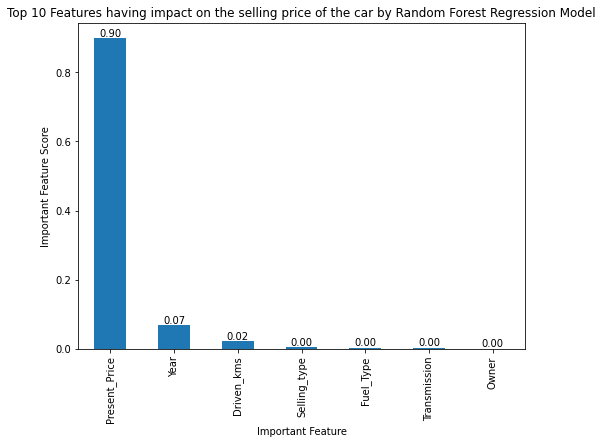

In [146]:
feature_importances = pd.Series(model_2.feature_importances_, index=x.columns)
plt.figure(figsize=(8, 6))
top_10_features = feature_importances.nlargest(10)
feature_importances.nlargest(10).plot(kind='bar')
plt.xlabel('Important Feature')
plt.ylabel('Important Feature Score')
plt.title('Top 10 Features having impact on the selling price of the car by Random Forest Regression Model')
for index, value in enumerate(top_10_features):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
feature_importances.to_csv('feature_importances.csv')
plt.savefig('Top 10 Features having impact on the selling price of the car by Random Forest Model.png',bbox_inches='tight',facecolor='white',pad_inches=0.1, dpi=100)
plt.show()

In [148]:
predicted_data=pd.DataFrame({'Actual Selling_Price': y_test, 'Predicted Selling_Price': y_pred3})
predicted_data.to_csv('predicted_data.csv', index=False)